## Построение социальных графов. Меры центральности

**Задание 1 (10 баллов)** 

Прочитайте данные из ```emails.csv```. В колонке ```message``` содержится информация о письме. Вам нужно сформировать несколько таблиц по данным для комфортной работы. 

Во-первых, у Вас имеется информация от том от когдо было отправленно письмо и кому:

* ```From``` - email отправителя
* ```X-From``` - имя отправитела 
* ```To``` - email получателя 
* ```X-To``` - имя получателя

Каждому индивидууму нужно присвоить свой уникальный ```id``` и сформировать таблицу, где по нему можно получить ```email``` и имя.

Также Вам нужно сформировать таблицу, в которой по каждому письму будет содержаться: 

* Дата
* ```id``` отправителя
* ```id``` получателей (обратитие внимание на то, что одно письмо может получать несколько человек)
* Текст

In [1]:
import sys
sys.path.append('C:\Program Files\Anaconda3\Lib\site-packages')

In [2]:
import pandas as pd
import re
from tqdm import tqdm

In [3]:
emails = pd.read_csv('D:/baklazhan/Compling/programmimng_solutions/python_nlp-master/emails.csv')

In [2]:
#emails = pd.read_csv('C:/Users/ALapidus/Desktop/emails.csv')

In [ ]:
emails.head()

In [5]:
#emails.iloc[412].message.replace('\n\t','').split('\n')
#emails.iloc[86].message.replace('\n\t','').replace('\n ',' ').split('\n')
emails.iloc[86].message

"Message-ID: <12599900.1075855689029.JavaMail.evans@thyme>\nDate: Fri, 25 Aug 2000 03:30:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: brad.mcsherry@enron.com\nSubject: \nCc: john.lavorato@enron.com, hunter.shively@enron.com\nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nBcc: john.lavorato@enron.com, hunter.shively@enron.com\nX-From: Phillip K Allen\nX-To: Brad McSherry\nX-cc: John J Lavorato, Hunter S Shively\nX-bcc: \nX-Folder: \\Phillip_Allen_Dec2000\\Notes Folders\\'sent mail\nX-Origin: Allen-P\nX-FileName: pallen.nsf\n\nBrad,\n\n With regard to Tori Kuykendall, I would like to promote her to commercial \nmanager instead of converting her from a commercial support manager to an \nassociate.  Her duties since the beginning of the year have been those of a \ncommercial manager.  I have no doubt that she will compare favorably to \nothers in that category at year end.  \n\n Martin Cuilla on the central desk is in a similiar situat

In [11]:
[emails_sample.iloc[i].message.replace('\n\t','').split('\n')[:18] for i in range(50, 100)]

[['Message-ID: <11798943.1075854281413.JavaMail.evans@thyme>',
  'Date: Thu, 21 Dec 2000 03:43:00 -0800 (PST)',
  'From: mjones7@txu.com',
  'To: daren.j.farmer@enron.com, ggreen2@txu.com, cstone1@txu.com, kenenglish@txu.com, gary.a.hanks@enron.com, earl.tisdale@enron.com, davila1@txu.com, liz.bellamy@enron.com',
  'Subject: HPL Nom for December 22, 2000',
  'Mime-Version: 1.0',
  'Content-Type: text/plain; charset=us-ascii',
  'Content-Transfer-Encoding: 7bit',
  'X-From: "Melissa Jones" <mjones7@txu.com>',
  'X-To: daren.j.farmer@enron.com, "Gary Green" <ggreen2@txu.com>, "Charlie Stone" <cstone1@txu.com>, kenenglish@txu.com, gary.a.hanks@enron.com, earl.tisdale@enron.com, "David Avila" <davila1@txu.com>, Liz.Bellamy@enron.com',
  'X-cc: ',
  'X-bcc: ',
  'X-Folder: \\Darren_Farmer_Jun2001\\Notes Folders\\Discussion threads',
  'X-Origin: Farmer-D',
  'X-FileName: dfarmer.nsf',
  '',
  '(See attached file: HPLN1222.xls)',
  ''],
 ['Message-ID: <29498501.1075845217778.JavaMail.evans@t

In [96]:
emails_sample.iloc[7].message.replace('\n\t','').split('\n')

['Message-ID: <6526027.1075840338266.JavaMail.evans@thyme>',
 'Date: Wed, 28 Nov 2001 15:55:16 -0800 (PST)',
 'From: lisa_lawson@platts.com',
 "To: e-mail <.andy@enron.com>, e-mail <.chuck@enron.com>, e-mail <.dave@enron.com>, e-mail <.dave@enron.com>, e-mail <.david@enron.com>, don.baughman@enron.com, e-mail <.don@enron.com>, e-mail <.douglas.@enron.com>, dave.ernsberger@enron.com, e-mail <.griff.@enron.com>, e-mail <.jason@enron.com>, e-mail <.jim@enron.com>, e-mail <.joe@enron.com>, joe.errigo@enron.com, e-mail <.john.@enron.com>, brian.jordan@enron.com, e-mail <.'kenneth.@enron.com>, lisa.lawson@enron.com, e-mail <.lisa@enron.com>, e-mail <.'mike.@enron.com>, e-mail <.rick@enron.com>, e-mail <.scott@enron.com>, e-mail <.timothy@enron.com>, mike.wilczek@enron.com",
 'Subject: Into Cinergy Hourly Index for November 27, 2001',
 'Mime-Version: 1.0',
 'Content-Type: text/plain; charset=us-ascii',
 'Content-Transfer-Encoding: 7bit',
 'X-From: "Lawson, Lisa" <Lisa_Lawson@platts.com>@ENRON

In [13]:
emails_sample = emails.sample(n = 10000)

In [26]:
emails_sample = emails_sample.reset_index(drop = True)

In [15]:
"""def make_contacts_dict(df):
    contacts_dict = {}
    mail_to_list = []
    for index, row in tqdm(df.iterrows()):
        message_split = row['message'].split('\n\n')
        meta = message_split[0]
        text = '\n\n'.join(message_split[1:])
        meta_list = meta.replace('\n\t','').replace('\n ',' ').split('\n')
        for attr in meta_list:
            attr = attr.split(': ')
            if (attr[0] == 'From'):
                mail_from = attr[1]
            if (attr[0] == 'To'):
                mail_to_list = attr[1].split(', ')
            if (attr[0] == 'X-From'):
                name_from = attr[1]
            if (attr[0] == 'X-To'):
                if ('"' in attr[1]):
                    name_to_list = re.findall(r'"(.*?)"', attr[1])
                elif ('</O=ENRON/OU=NA/CN=RECIPIENTS/' in attr[1]):
                    name_to_list = [re.sub(r'.+>,','', name) for name in attr[1].split('</O=ENRON/OU=NA/CN=RECIPIENTS/')]
                else:
                    name_to_list = attr[1].split(', ')

        #print(mail_from, name_from)
        name_from = re.sub(r'<.*?>', '', name_from.replace('@ ENRON', ''))
        contacts_dict.setdefault(mail_from, name_from.strip())

        for mail_to, name_to in zip(mail_to_list, name_to_list):
            name_to = re.sub(r'<.*?>', '', name_to.replace('@ ENRON', ''))
            name_to = re.sub(r'SF40#.+#', '', name_to)
            contacts_dict.setdefault(mail_to, name_to.strip())
            #print(index, mail_to, name_to)
    return contacts_dict"""

    

In [107]:
def make_contacts_dict(df):
    contacts_dict = {}
    #mail_to_list = []
    for index, row in tqdm(df.iterrows()):
        meta = ''
        text = ''
        mail_from = ''
        name_from = ''
        mail_to_list = []
        name_to_list = []
        
        message_split = row['message'].split('\n\n')
        meta = message_split[0]
        text = '\n\n'.join(message_split[1:])
        meta_list = meta.replace('\n\t','').replace('\n ',' ').split('\n')
        for attr in meta_list:
            attr = attr.split(': ')
            if (attr[0] == 'From'):
                mail_from = attr[1]
            if (attr[0] == 'To'):
                mail_to_list = attr[1].split(', ')
            if (attr[0] == 'X-From'):
                name_from = attr[1]
            if (attr[0] == 'X-To'):
                #names = re.sub('([-\w\.() ]+),?([-\w\.() ]+) <[-\w\.]+@[-\w\.]+>', '\\1\\2', attr[1])
                #names_to = re.sub('([-\w\.() ]+),?([-\w\.() ]+) </O=ENRON/OU=NA/CN=RECIPIENTS/[-\w/=]+>','\\1\\2', names)
                names_to = re.sub('([-\w\.() ]+),?([-\w\.() ]+) <[-\w\./=@]+>', '\\1\\2', attr[1])
                names_to = (re.sub('("[-\w\.() ]+),?([-\w\.() ]+")' , '\\1\\2', names_to)).replace('"','')
                name_to_list = names_to.split(', ')
                
                """
                if ('"' in attr[1]):
                    name_to_list = re.findall(r'"(.*?)"', attr[1])
                elif ('</O=ENRON/OU=NA/CN=RECIPIENTS/' in attr[1]):
                    name_to_list = [re.sub(r'.+>,','', name) for name in attr[1].split('</O=ENRON/OU=NA/CN=RECIPIENTS/')]
                else:
                    name_to_list = attr[1].split(', ')
                """
        #print(mail_from, name_from)
        name_from = re.sub(r'<.*?>', '', name_from.replace('@ ENRON', ''))
        contacts_dict.setdefault(mail_from, name_from.strip())

        #if len(mail_to_list) != len(name_to_list):
         #   print(index, len(mail_to_list), len(name_to_list))
          #  print(mail_to_list)
           # print(name_to_list)
            #print('\n')
        
        if len(mail_to_list) > len(name_to_list):
            dif = len(mail_to_list) - len(name_to_list)
            for i in range(dif):
                name_to_list.append('')
        
        if (mail_to_list and name_to_list):
            for mail_to, name_to in zip(mail_to_list, name_to_list):
                name_to = re.sub(r'<.*?>', '', name_to.replace('@ ENRON', '').replace('(E-mail)', ''))
                name_to = re.sub(r'SF40#.+#', '', name_to)
                contacts_dict.setdefault(mail_to, name_to.strip())
                #print(index, mail_to, name_to)   
                
    return contacts_dict


In [5]:
names = 'Novosel, Sarah </O=ENRON/OU=NA/CN=RECIPIENTS/CN=NOTESADDR/CN=E8015336-2D09A27C-862566B9-5830A9>, Alvarez, Ray </O=ENRON/OU=NA/CN=RECIPIENTS/CN=NOTESADDR/CN=EBE4476B-2D94882A-86256A14-75FF3B>, Hartsoe, Joe </O=ENRON/OU=NA/CN=RECIPIENTS/CN=NOTESADDR/CN=AA8CC789-55F05846-862566B9-583A12>, Bagot, Nancy </O=ENRON/OU=NA/CN=RECIPIENTS/CN=NOTESADDR/CN=716CAD03-A5CB7D52-86256952-61A958>, Fulton, Donna </O=ENRON/OU=NA/CN=RECIPIENTS/CN=NOTESADDR/CN=CDE8DAE-A0B9AB37-862566B7-7A1609>, Briggs, Tom </O=ENRON/OU=NA/CN=RECIPIENTS/CN=NOTESADDR/CN=179E5C8C-206E9F55-8625691E-7D943>, Nersesian, Carin </O=ENRON/OU=NA/CN=RECIPIENTS/CN=NOTESADDR/CN=4CF0E754-2B22EC7C-86256A08-7190CA>, Comnes, Alan'

In [97]:
#names = 'Ward, Kim S (Houston) </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Kward>'
#names = 'Bland, Todd <Todd.Bland@ENRON.com>, Dean, Craig (Houston) <Craig.Dean@ENRON.com>, Guzman, Mark </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Mguzman3>, Harasin, Leaf </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Lharasin>, Linder, Eric </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Elinder>, Merriss, Steven </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Smerris>, Meyers, Bert </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Bmeyers>, Porter, David V. </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Dporter3>, Slinger, Ryan </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Rslinger>, Solberg, Geir </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Gsolber>, Symes, Kate </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Ksymes>, Williams III, Bill </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Bwillia5>'
names = 'Andy Tuschong (E-mail) <Andy.Tuschong@Cinergy.COM>, "Anthony\\" <Anthony. Due@\\"Due (E-mail)", Bob Brunner (E-mail) <bob.brunner@lgeenergy.com>, Chuck Whitlock (E-mail) <charles.whitlock@cinergy.com>, Dave Antonides (E-mail) <dantonides@DAYTONPOWER.com>, Dave Holder (E-mail) <dholder@aeglobalmarkets.com>, David Behrman (E-mail) <David_Behrman@platts.com>, Baughman Jr., Don </O=ENRON/OU=NA/CN=RECIPIENTS/CN=DBAUGHM>, Don Theriualt (E-mail) <detheriault@nisource.com>, Douglas. Lawrence (E-mail) <Douglas.Lawrence@dynegy.com>, Ernsberger, Dave <dave_ernsberger@platts.com>, Griff. E. Jones (E-mail) <Griff.E.Jones@dynegy.com>, Jason Earnheart (E-mail) <jason.earnheart@williams.com>, Jim Sadtler (E-mail) <jsadtler@ipalco.com>, Joe Belford (E-mail) <Joe.Belford@Cinergy.com>, Errigo, Joe </O=ENRON/OU=NA/CN=RECIPIENTS/CN=JERRIGO>, John. Tignor (E-mail) <john.tignor@engageenergy.com>, Jordan, Brian <brian_jordan@platts.com>, \'Kenneth. James (E-mail) <kenneth.james@williams.com>, Lawson, Lisa <Lisa_Lawson@platts.com>, Lisa Lawson (E-mail) <ll_mwdaily@yahoo.com>, \'Mike. Mushrush (E-mail) <mike.mushrush@williams.com>, Rick Abernathy (E-mail) <rjab@dynegy.com>, Ryan@Cinergy <ryan.gentil@cinergy.com>, Scott Burnside (E-mail) <Scott.Burnside@Cinergy.COM>, "Shannah\\" <Shannah. Goins \\"Goins (E-mail)"@ENRON, Teri Viswanath (E-mail) <Teri.Viswanath@dynegy.com>, Timothy B. Ferguson (E-mail) <tim.ferguson@cinergy.com>, Wilczek, Mike <mike_wilczek@platts.com>'

In [102]:
re.sub('([-\w\.() ]+),?([-\w\.() ]+) <[-\w\./=@]+>', '\\1\\2', names).split(', ')
#names = re.sub('([-\w\.() ]+),?([-\w\.() ]+) <[-\w\.]+@[-\w\.]+>', '\\1\\2', names)
#re.sub('([-\w\.() ]+),?([-\w\.() ]+) </O=ENRON/OU=NA/CN=RECIPIENTS/[-\w/=]+>','\\1\\2', names)



['Andy Tuschong (E-mail)',
 '"Anthony\\" <Anthony. Due@\\"Due (E-mail)"',
 'Bob Brunner (E-mail)',
 'Chuck Whitlock (E-mail)',
 'Dave Antonides (E-mail)',
 'Dave Holder (E-mail)',
 'David Behrman (E-mail)',
 'Baughman Jr. Don',
 'Don Theriualt (E-mail)',
 'Douglas. Lawrence (E-mail)',
 'Ernsberger Dave',
 'Griff. E. Jones (E-mail)',
 'Jason Earnheart (E-mail)',
 'Jim Sadtler (E-mail)',
 'Joe Belford (E-mail)',
 'Errigo Joe',
 'John. Tignor (E-mail)',
 'Jordan Brian',
 "'Kenneth. James (E-mail)",
 'Lawson Lisa',
 'Lisa Lawson (E-mail)',
 "'Mike. Mushrush (E-mail)",
 'Rick Abernathy (E-mail)',
 'Ryan@Cinergy',
 'Scott Burnside (E-mail)',
 '"Shannah\\" <Shannah. Goins \\"Goins (E-mail)"@ENRON Teri Viswanath (E-mail)',
 'Timothy B. Ferguson (E-mail)',
 'Wilczek Mike']

In [51]:
(re.sub('("[-\w\. ]+),?([-\w\. ]+")' , '\\1\\2', '"OTC, Dispatch" ghjl, "Joe, John" fjkldk;s|')).replace('"','')

'OTC Dispatch ghjl, Joe John fjkldk;s|'

In [111]:
contacts_dict = make_contacts_dict(emails_sample)

10000it [00:09, 1018.89it/s]


In [ ]:
'ashley.a.mace@williams.com': '"Mace, Ashley A" @ENRON'

In [113]:
contacts_dict

{'ken.skilling@enron.com': 'Ken Lay and Jeff Skilling',
 'jgilchrist@viant.com': 'jgilchrist@viant.com',
 'miguel.l.garcia@enron.com': 'miguel.l.garcia@enron.com',
 'kenneth.seaman@enron.com': 'Kenneth Seaman',
 'venkatesh.mani@enron.com': 'Chris Holmes',
 'ashley.a.mace@williams.com': '"Mace, Ashley A" @ENRON',
 'chris.basham@bus.utexas.edu': 'chris.basham@bus.utexas.edu',
 'john.buynak@verizon.net': 'John Buynak',
 'stathis.tompaidis@bus.utexas.edu': '',
 'scott.pack@enron.com': 'Pack Jr. Scott',
 'jr..pedro@enron.com': 'PEDRO SERRANO JR.',
 'carlsonm@mail.utexas.edu': 'lederington@ou.edu',
 'piers.duggan@enron.com': 'Duggan Piers',
 'kdestep@columbiaenergygroup.com': 'kdestep@columbiaenergygroup.com',
 'michael.moran@enron.com': 'michael.moran@enron.com@SMTP@enronXgate',
 'anthony.kim@enron.com': 'kim & joey anthony',
 'rae.meadows@enron.com': 'Rae Meadows',
 'ned.crady@enron.com': 'Ned E Crady',
 'dsloan@pge-nw.com': 'dsloan@pge-nw.com',
 'd..mitchell@enron.com': 'Mills Scott',
 's

In [112]:
len(contacts_dict)

13938

In [114]:
contacts = pd.DataFrame(data = list(zip(contacts_dict.keys(), contacts_dict.values())), 
                       columns = ['email', 'name'])

In [115]:
contacts = contacts.reset_index()
contacts.columns = ['id', 'email','name']
contacts.head()

,id,email,name
0,0,ken.skilling@enron.com,Ken Lay and Jeff Skilling
1,1,jgilchrist@viant.com,jgilchrist@viant.com
2,2,miguel.l.garcia@enron.com,miguel.l.garcia@enron.com
3,3,kenneth.seaman@enron.com,Kenneth Seaman
4,4,venkatesh.mani@enron.com,Chris Holmes


In [116]:
contacts.shape

(13938, 3)

In [117]:
def make_emails_df(raw_emails_df, contacts_df):
    #contacts_dict = {}
    dates = []
    texts = []
    id_from = []
    id_to = []
    
    for index, row in tqdm(raw_emails_df.iterrows()):
        mail_to_list = []
        message_split = row['message'].split('\n\n')
        meta = message_split[0]
        text = ('\n\n'.join(message_split[1:])).strip()
        texts.append(text)
        meta_list = meta.replace('\n\t','').replace('\n ',' ').split('\n')
        for attr in meta_list:
            attr = attr.split(': ')
            if (attr[0] == 'Date'):
                date = attr[1]
            if (attr[0] == 'From'):
                mail_from = attr[1]
            if (attr[0] == 'To'):
                mail_to_list = attr[1].split(', ')
            #if (attr[0] == 'X-From'):
            #    name_from = attr[1]
            #if (attr[0] == 'X-To'):
            #    if ('"' in attr[1]):
            #        name_to_list = re.findall(r'"(.*?)"', attr[1])
            #    else:
            #        name_to_list = attr[1].split(', ')

        dates.append(date)
        #id_from.append(int(contacts_df[(contacts_df.email == mail_from)&(contacts_df.name == name_from)].id))
        id_from.append(int(contacts_df[contacts_df.email == mail_from].id))

        #id_to.append([contacts_df[(contacts_df.email == mail_to)&(contacts_df.name == name_to)].id for mail_to, name_to in zip(mail_to_list, name_to_list)])
        id_to_list = []
        if mail_to_list:
            for mail_to in mail_to_list:
                #print(contacts_df[(contacts_df.email == mail_to)&(contacts_df.name == name_to)].id)
                #print(mail_to, name_to)
                #id_to_list.append(str(int(contacts_df[(contacts_df.email == mail_to)&(contacts_df.name == name_to)].id)))
                #print(mail_to, contacts_df[contacts_df.email == mail_to].id)
                id_to_list.append(str(int(contacts_df[contacts_df.email == mail_to].id)))
            id_to.append(','.join(id_to_list))
        else:
            id_to.append('')
        
            #contacts_dict.setdefault(mail_to, name_to)
            #print(index, mail_to, name_to)
    emails_df = pd.DataFrame({'date':dates, 'id_from':id_from, 'id_to':id_to, 'text':texts})
    return emails_df

In [121]:
"""for index, row in emails_sample.iterrows():
    message_split = row['message'].split('\n\n')
    meta = message_split[0]
    #text = '\n\n'.join(message_split[1:])
    #texts.append(text)
    meta_list = meta.replace('\n\t','').replace('\n ',' ').split('\n')
    for attr in meta_list:
        attr = attr.split(': ')
        if (attr[0] == 'To'):
            if ('sscott3@enron.com, davef@jmbm.com' in attr[1]):
                print(index, meta)"""

"for index, row in emails_sample.iterrows():\n    message_split = row['message'].split('\n\n')\n    meta = message_split[0]\n    #text = '\n\n'.join(message_split[1:])\n    #texts.append(text)\n    meta_list = meta.replace('\n\t','').replace('\n ',' ').split('\n')\n    for attr in meta_list:\n        attr = attr.split(': ')\n        if (attr[0] == 'To'):\n            if ('sscott3@enron.com, davef@jmbm.com' in attr[1]):\n                print(index, meta)"

In [34]:
contacts_dict['constantine.brian@enron.com']

KeyError: 'constantine.brian@enron.com'

In [118]:
emails_df = make_emails_df(emails_sample, contacts)


10000it [08:38, 19.27it/s]


In [119]:
emails_df.head(20)

,date,id_from,id_to,text
0,"Thu, 30 Nov 2000 08:11:00 -0800 (PST)",11629,"11248,6631,6201,2597,7258,10095,7587,12752,241...",Thanks for everyone's help with the schedules....
1,"Sun, 3 Feb 2002 20:37:10 -0800 (PST)",311,311,\n\nStart Date: 2/3/02; HourAhead hour: 19; N...
2,"Fri, 1 Dec 2000 08:23:00 -0800 (PST)",10405,"13434,4843,12765,2306,10893,4134,6199,9236,780...",Don't forget to reserve your spot- \n\n\nJen F...
3,"Thu, 5 Apr 2001 10:55:00 -0700 (PDT)",8205,"5428,5441,10076","Sorry for the late notice, but is it possible ..."
4,"Tue, 13 Feb 2001 03:07:00 -0800 (PST)",12236,5441,Please review and get back to John. Thanks.\n-...
5,"Mon, 18 Sep 2000 02:50:00 -0700 (PDT)",1606,4844,that is my reputation
6,"Mon, 11 Dec 2000 12:26:00 -0800 (PST)",7758,3697,"Dear TI reader, =20\n\nTigerInvestor.com is no..."
7,"Wed, 28 Nov 2001 15:55:16 -0800 (PST)",2239,"2108,9025,443,443,46,6719,12176,125,2059,11201...",<<CinergyHourlyTableNov27.xls>>\n\nLisa Lawso...
8,"Tue, 14 Nov 2000 04:19:00 -0800 (PST)",409,"4474,3399",FYI.\n---------------------- Forwarded by Kay ...
9,"Sat, 28 Apr 2001 05:34:00 -0700 (PDT)",2033,409,"-----Original Message-----\nFrom: Rorschach,..."


In [198]:
emails_df[emails_df.id_to == ''].shape

(0, 4)

In [123]:
emails_df = emails_df[emails_df.id_to != '']

In [124]:
emails_df = emails_df.reset_index(drop=True)

In [125]:
emails_df.shape

(9545, 4)

In [126]:
contacts.shape

(13938, 3)

**Задание 2 (15 баллов)** 

Сформируйте матрицу $A = (a_{ij})_{i,j = 1}^N$, где $a_{ij}$ - количество писем, которое индивид $i$ отправил индивиду $j$, $N$ - количество индивидуумов

Далее из матрицы $A$ получим симметричную матрицу, которая будет показывать нам частоту коммуникаций между каждой парой индивидов: $A+A^T$. Постройте по данной матрице не направленный граф, где узлы должны называться по именам, которые вы извлекли из ```X-From``` и ```X-To```

**Замечание.** Так как граф слишком большой, то вы можете оставить только наиболее активных участников.

In [127]:
import numpy as np

In [15]:
[int(mail) for mail in emails_df.iloc[1].id_to.split(',')]

[4]

In [130]:
def make_communication_matrix(df, contacts):
    N = contacts.shape[0]
    A = np.zeros((N,N))
    
    for index, row in df.iterrows():
        from_i = row['id_from']
        for to_j in row['id_to'].split(','):
            A[from_i][int(to_j)] += 1
    return A + np.transpose(A)
        

In [131]:
%%time
communication_matrix = make_communication_matrix(emails_df, contacts)

Wall time: 21.2 s


In [132]:
communication_matrix.shape

(13938, 13938)

In [137]:
max_com = communication_matrix.max()

In [138]:
max_com

366.0

In [134]:
communication_matrix.mean()

0.0006017877050202915

In [135]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
#plt.matshow(communication_matrix)
#plt.colorbar()

#plt.xticks(np.arange(N), le.classes_, rotation=90)
#plt.yticks(np.arange(N), le.classes_)

In [136]:
import networkx as nx

In [163]:
commun_measures = []
i, j = np.where(communication_matrix > 10)
for i_num, j_num in zip(i,j):
 #   if i_num > j_num:
    commun_measures.append(communication_matrix[i_num][j_num])
print(len(i))

575


In [164]:
commun_measures = commun_measures/max_com

In [165]:
communications = pd.DataFrame({'source':i, 'target':j, 'weight': commun_measures})

In [166]:
communications.head()

,source,target,weight
0,42,5441,0.054645
1,107,5441,0.095628
2,107,13622,0.030055
3,186,5441,0.054645
4,194,5441,0.046448


In [184]:
labels = dict(zip(contacts.id, contacts.name))

In [185]:
communications['source_name'] = [labels[source_id] for source_id in communications.source]
communications['target_name'] = [labels[target_id] for target_id in communications.target]

In [186]:
communications.head()

,source,target,weight,source_name,target_name
0,42,5441,0.054645,Richard Leibert,Jeff Dasovich
1,107,5441,0.095628,Sarah Novosel,Jeff Dasovich
2,107,13622,0.030055,Sarah Novosel,Steven J Kean
3,186,5441,0.054645,Tasha Lair,Jeff Dasovich
4,194,5441,0.046448,Greg Wolfe,Jeff Dasovich


C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed

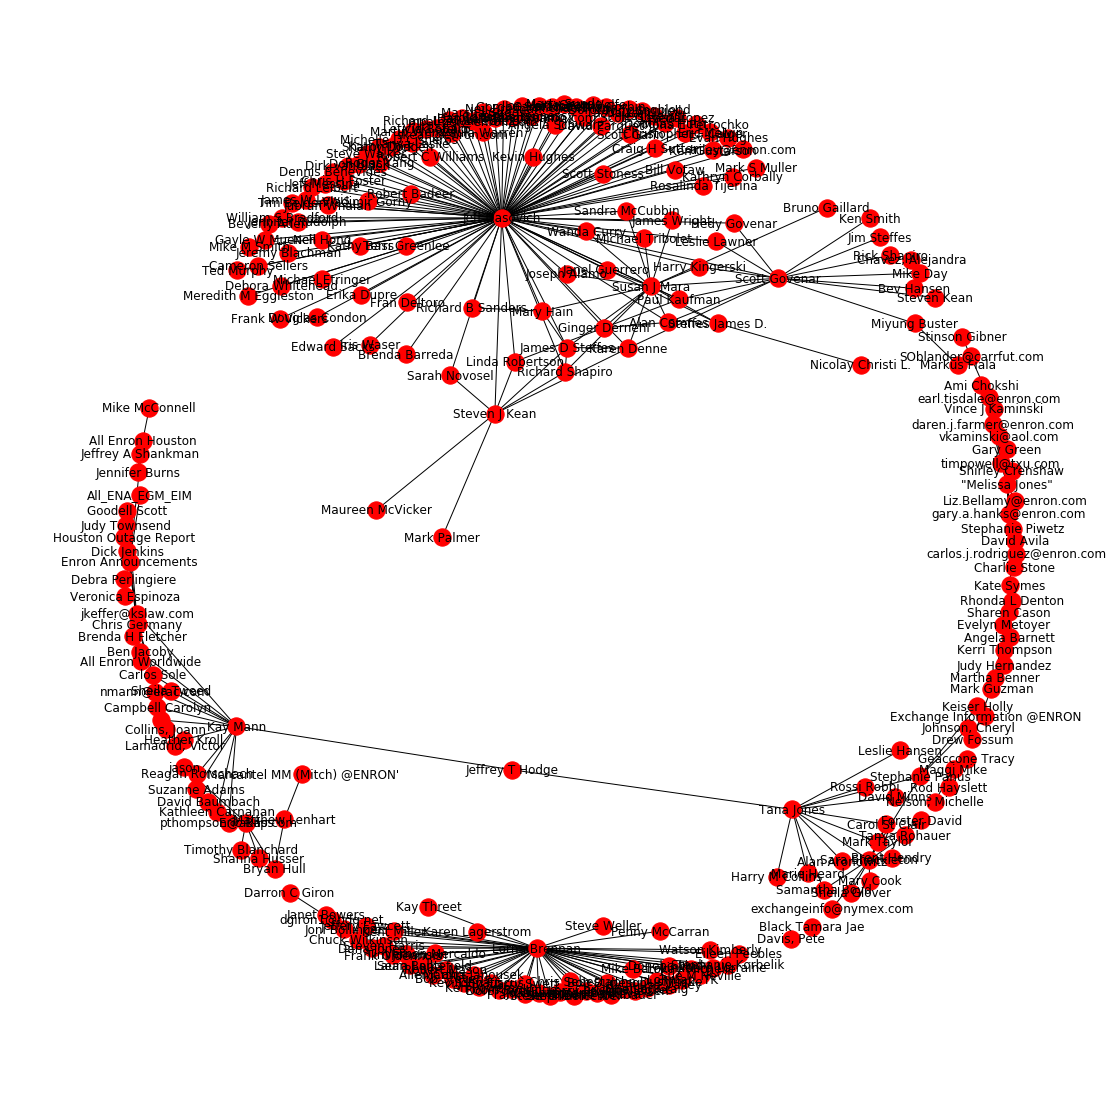

In [187]:
G = nx.from_pandas_dataframe(communications, 'source_name', 'target_name')

plt.figure(figsize=(15, 15))
nx.draw(G, with_labels = True)
plt.show()

**Задание 3 (25 баллов)**

Оцените важность отдельных узлов, используя следующие меры:

* Degree centrality
* Closeness centrality
* Betweenness centrality
* Eigenvector centrality

Подробнее читайте в статье: УЗЛЫ В СОЦИАЛЬНЫХ СЕТЯХ: МЕРЫ ЦЕНТРАЛЬНОСТИ И РОЛЬ В СЕТЕВЫХ ПРОЦЕССАХ

Для каждой меры центральности выведите топ пользователей

In [193]:
sorted(nx.degree_centrality(G).items(), key = lambda x: x[1], reverse = True)[:20]

[('Jeff Dasovich', 0.39772727272727276),
 ('Lorna Brennan', 0.18181818181818182),
 ('Susan J Mara', 0.07575757575757576),
 ('Scott Govenar', 0.05681818181818182),
 ('Kay Mann', 0.04924242424242424),
 ('Tana Jones', 0.045454545454545456),
 ('"Melissa Jones"', 0.03787878787878788),
 ('Sara Shackleton', 0.03787878787878788),
 ('Steven J Kean', 0.030303030303030304),
 ('Ginger Dernehl', 0.026515151515151516),
 ('Chris Germany', 0.022727272727272728),
 ('James D Steffes', 0.022727272727272728),
 ('Eric Bass', 0.022727272727272728),
 ('Kate Symes', 0.01893939393939394),
 ('Karen Denne', 0.01893939393939394),
 ('Mary Hain', 0.015151515151515152),
 ('Alan Comnes', 0.015151515151515152),
 ('Paul Kaufman', 0.015151515151515152),
 ('Richard Shapiro', 0.015151515151515152),
 ('Enron Announcements', 0.015151515151515152)]

In [195]:
sorted(nx.closeness_centrality(G).items(), key = lambda x: x[1], reverse = True)[:20]

[('Jeff Dasovich', 0.39886363636363636),
 ('Susan J Mara', 0.2367683686176837),
 ('Scott Govenar', 0.23356879606879605),
 ('Karen Denne', 0.2244687131050767),
 ('Alan Comnes', 0.2215909090909091),
 ('Paul Kaufman', 0.2215909090909091),
 ('Harry Kingerski', 0.22064796905222436),
 ('Steven J Kean', 0.21878596087456847),
 ('Leslie Lawner', 0.21878596087456847),
 ('Hedy Govenar', 0.21878596087456847),
 ('James D Steffes', 0.217866692131398),
 ('Richard Shapiro', 0.21605113636363635),
 ('Ginger Dernehl', 0.2151546586193889),
 ('Mary Hain', 0.2142655897821187),
 ('Linda Robertson', 0.2142655897821187),
 ('Steffes James D.', 0.2142655897821187),
 ('Sarah Novosel', 0.21338383838383837),
 ('Joseph Alamo', 0.21250931445603574),
 ('Sandra McCubbin', 0.21250931445603574),
 ('James Wright', 0.21250931445603574)]

In [196]:
sorted(nx.betweenness_centrality(G).items(), key = lambda x: x[1], reverse = True)[:20]

[('Jeff Dasovich', 0.18631418750240042),
 ('Lorna Brennan', 0.032492222606291046),
 ('Scott Govenar', 0.026138283980489303),
 ('Tana Jones', 0.01055709183085609),
 ('Kay Mann', 0.009160041479433115),
 ('Jeffrey T Hodge', 0.0074893420901025465),
 ('Steven J Kean', 0.00676201175250605),
 ('Susan J Mara', 0.006382743787686753),
 ('Sara Shackleton', 0.004536812996889043),
 ('Miyung Buster', 0.003341398778661136),
 ('Steffes James D.', 0.003341398778661136),
 ('Stephanie Panus', 0.001814725198755617),
 ('"Melissa Jones"', 0.0012962322848254408),
 ('Mark Taylor', 0.0009217651803203134),
 ('Karen Denne', 0.0005184929139301763),
 ('Eric Bass', 0.0005184929139301763),
 ('Chris Germany', 0.0004320774282751469),
 ('Kate Symes', 0.00040327226639013715),
 ('Matthew Lenhart', 0.00017283097131005876),
 ('Enron Announcements', 0.00017283097131005876)]

In [197]:
sorted(nx.eigenvector_centrality(G).items(), key = lambda x: x[1], reverse = True)[:20]

NetworkXError: eigenvector_centrality():
power iteration failed to converge in %d iterations."%(i+1))

**Бонусное задание (25 баллов)** 

Выделите темы, которые обсуждаются в письмах.

Выберите одну из мер центральности и для топа пользователей по данной мере укажите, какие темы они обсуждают чаще всего и с кем.